In [1]:
import orchest
import pandas as pd
import time
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from et import ET, ETT
from typing import Dict
import numpy as np
from utils import Anomaly

In [2]:
data = orchest.get_inputs()

In [3]:
clarify_data = data['clarify_data']
normalized_data = data['normalized_data']
# energy_consumption_dfs = clarify_data['energy_consumption']
energy_consumption_dfs = normalized_data['energy_consumption']
temperature_df = clarify_data['temperature']

et_curves_data = data['et_curves']
ett_dict: ETT = et_curves_data['ett_day_of_week']

In [4]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [5]:
# building_names = list(ett_dict.keys())

# anomalies_dict = {}
# for building_name in building_names:
#     anomalies_list = []
#     for day in week_days:
#         et: ET = ett_dict[building_name][day]
#         a = et.get_anomolies_series(energy_consumption_dfs['daily'][building_name]['Totalt'], temperature_df['daily']['Voll TAN'])
#         anomalies_list.append(a)
    
#     anomalies_series = pd.concat(anomalies_list)
#     anomalies_dict[building_name] = anomalies_series


Monday


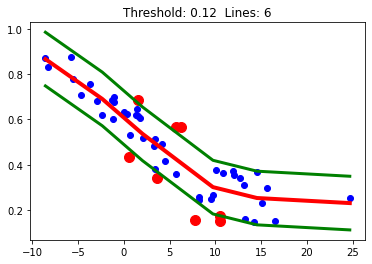

Tuesday


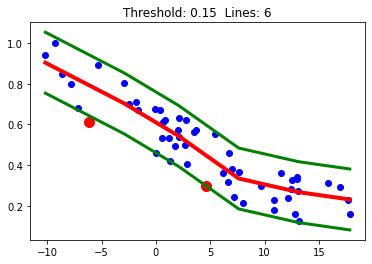

Wednesday


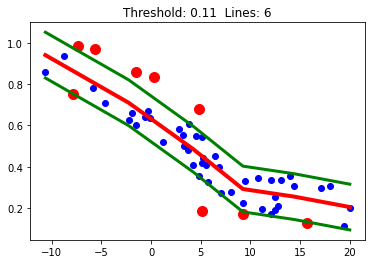

Thursday


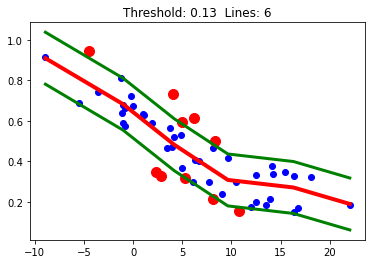

Friday


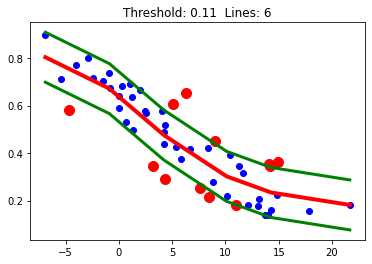

Saturday


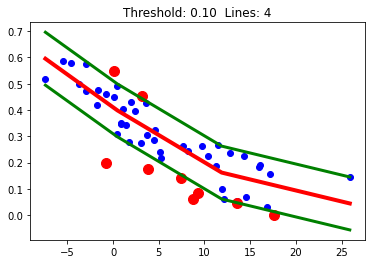

Sunday


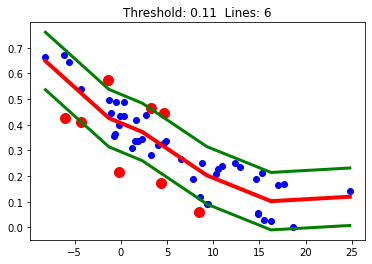

Monday


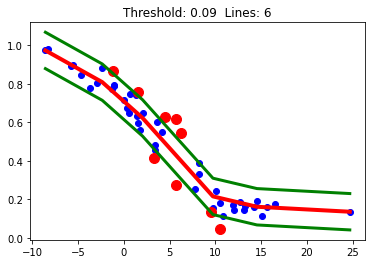

Tuesday


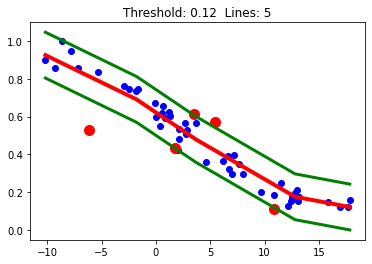

Wednesday


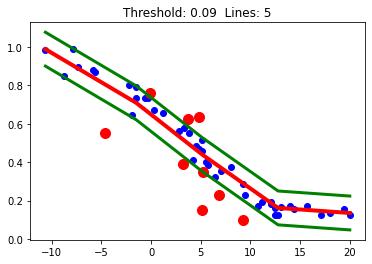

Thursday


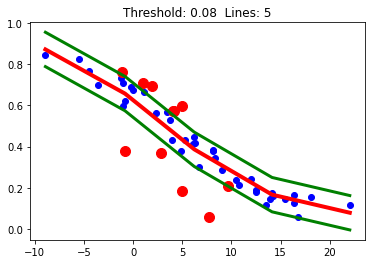

Friday


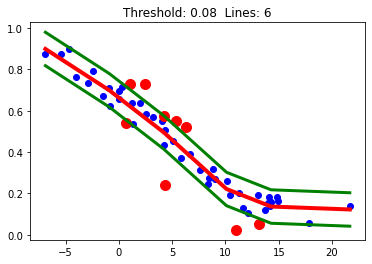

Saturday


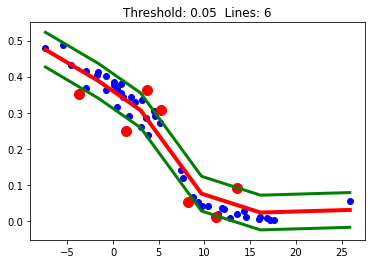

Sunday


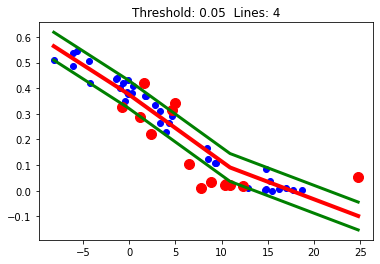

In [6]:
building_names = list(ett_dict.keys())

i = 0

anomalies_dict = {}
for building_name in building_names:
    # anomalies_list = []
    # for day in week_days:
    #     et: ET = ett_dict[building_name][day]
    #     a = et.get_anomolies(energy_consumption_dfs['daily'][building_name]['Totalt'], temperature_df['daily']['Voll TAN'], building_name)
    #     anomalies_list.extend(a)
    # anomalies_dict[building_name] = anomalies_list
    # TODO: type
    anomalies_dict[building_name] = ett_dict[building_name].get_anomalies(energy_consumption_dfs['daily'][building_name]['Totalt'], temperature_df['daily']['Voll TAN'], building_name)
    if i < 2:
        ett_dict[building_name].plot(energy_consumption_dfs['daily'][building_name]['Totalt'], temperature_df['daily']['Voll TAN'])
    i += 1

# building_name = list(anomalies_dict.keys())[0]

In [7]:
anomalies_from_et = {
    'anomalies_from_ett': anomalies_dict
}

In [8]:
print('outputting anomalies from et...')
orchest.output(anomalies_from_et, name='anomalies_from_et')
print('success')

outputting anomalies from et...
success


In [9]:
# building_dfs = energy_consumption_dfs['daily']

# ETTs = ett_dict

# daily_temp = temperature_df['daily']['Voll TAN']

In [10]:
# start_looking_for_anomalies = datatime(2019, 12, 20)

# Find number of anomalies for each day

In [11]:
# find how many anomalies are each day. This is summed over all buildings
days_amount = len(daily_temp)
anomalies_per_day = np.zeros(days_amount)

# go through all buildings
for building_name, building_data in list(building_dfs.items()):
    # skip building if it does not have ETT
    if building_name not in ETTs.keys():
        continue

    building_energy = building_data['Totalt']
    # load ETT for this building
    ETT = ETTs[building_name]

    for day, et in ETT.items():
        # get energy and temperature data for this day
        day_energy = building_energy.loc[building_energy.index.weekday == week_days.index(day)]
        day_temp = daily_temp.loc[daily_temp.index.weekday == week_days.index(day)]

        # get anomalies for this weekday
        anomalies = et.get_anomolies_series(day_energy, day_temp)
        # get days after first index in day_energy
        days_after_start = [(anomaly - building_energy.index[0]).days for anomaly in anomalies.index]
        # update the amount of anomalies for these days
        anomalies_per_day[days_after_start] += 1

# # plot the amount of anomalies for each day
# plt.title('Anomalies per day')
# plt.scatter(np.arange(days_amount), anomalies_per_day, label='Number of Anomalies')
# # plot temperature data
# plt.plot(-daily_temp.values+20, label='Negative Temperature + 20', color='red')
# plt.legend()
# plt.show()


# plot the amount of anomalies for each day of the year
# anomalies_per_day_year = anomalies_per_day[:-2]
# anomalies_per_day_year = anomalies_per_day_year.reshape(5, -1)
# anomalies_per_day_year = np.sum(anomalies_per_day_year, axis=0) / 5
# temp_sum = daily_temp.values[:-2]
# temp_sum = temp_sum.reshape(5, -1)
# temp_sum = np.average(temp_sum, axis=0)
# plt.title('Anomalies per day of the year')
# plt.scatter(np.arange(365), anomalies_per_day_year, label='Number of Anomalies')
# plt.plot(-temp_sum + 20, label='Negative Temperature + 20', color='red')
# plt.legend()
# plt.show()

NameError: name 'daily_temp' is not defined

In [ ]:
# plot the amount of anomalies for each day sorted descending
# because so many days have the same amount the knee method stops too early. stepping over some points fixes this
# anomalies_per_day_sorted = np.sort(anomalies_per_day)[::-5]
# days = len(anomalies_per_day_sorted)

# plt.scatter(np.arange(days), anomalies_per_day_sorted, label='Number of Anomalies')
# knee_idx = KneeLocator(np.arange(days), anomalies_per_day_sorted, curve='convex', direction='decreasing').knee
# knee_value = anomalies_per_day_sorted[knee_idx]
# plt.vlines(knee_idx, 0, plt.ylim()[1], label='Knee', linestyles='dashed')
# plt.axhline(y=knee_value, color='black', linestyle='dashed')
# plt.title('Anomalies per day sorted descending - knee at ' + str(knee_idx) + ' with value ' + str(knee_value))
# plt.legend()
# plt.show()

# plot the graphs from earlier with a horizontal line at knee_value
# plt.title('Anomalies per day')
# plt.scatter(np.arange(days_amount), anomalies_per_day, label='Number of Anomalies')
# plt.plot(-daily_temp.values+20, label='Negative Temperature + 20', color='red')
# plt.axhline(y=knee_value, color='black', linestyle='dashed')
# plt.legend()
# plt.show()

# the same but day of the year
# anomalies_per_day_year_sorted = np.sort(anomalies_per_day_year)[::-5]
# days = len(anomalies_per_day_year_sorted)
# plt.scatter(np.arange(days), anomalies_per_day_year_sorted, label='Number of Anomalies')
# knee_idx = KneeLocator(np.arange(days), anomalies_per_day_year_sorted, curve='convex', direction='decreasing').knee
# knee_value_year = anomalies_per_day_year_sorted[knee_idx]
# plt.vlines(knee_idx, 0, plt.ylim()[1], label='Knee', linestyles='dashed')
# plt.axhline(y=knee_value_year, color='black', linestyle='dashed')
# plt.title('Anomalies per day of the year sorted descending - knee at ' + str(knee_idx) + ' with value ' + str(knee_value_year))
# plt.legend()
# plt.show()

# plot the graphs from earlier with a horizontal line at knee_value_year
# plt.title('Anomalies per day of the year')
# plt.scatter(np.arange(365), anomalies_per_day_year, label='Number of Anomalies')
# plt.plot(-temp_sum + 20, label='Negative Temperature + 20', color='red')
# plt.axhline(y=knee_value_year, color='black', linestyle='dashed')
# plt.legend()
# plt.show()

In [ ]:
# plot the Energy usage and it's anomalies of a random building
# building_name = random.choice(list(ETTs.keys()))
'''
building_name = list(building_dfs.keys())[1]
ETT = ETTs[building_name]
building_energy = building_dfs[building_name]['Totalt']

anomalies = []
for day, et in ETT.items():
    day_energy = building_energy.loc[building_energy.index.weekday == week_days.index(day)]
    day_temp = daily_temp.loc[daily_temp.index.weekday == week_days.index(day)]
    dates = et.get_anomolies_series(day_energy, day_temp).index
    anomalies.extend(dates)

# plot energy usage and anomalies
plt.title('Energy usage and all anomalies: ' + building_name)
plt.plot(building_energy, label='Energy usage')
plt.scatter(anomalies, building_energy.loc[anomalies], label='Anomalies', color='red')
plt.legend()
plt.show()
print('Anomalies: ' + str(len(anomalies)))

# remove an anomaly if there are more than knee_value_year anomalies that day
# turn anomalies dates to day of year list
days_of_year = [anomaly.timetuple().tm_yday -1 for anomaly in anomalies]
days_of_year = np.array(days_of_year)
anomalies_on_days_of_year = anomalies_per_day_year[days_of_year]
# external_factor_mask = anomalies_on_days_of_year > knee_value_year
external_factor_mask = anomalies_on_days_of_year > (-daily_temp+25)[days_of_year]
# remove anomalies where mask is true
new_anomalies = [anomaly for anomaly, mask in zip(anomalies, external_factor_mask) if not mask]
anomalies_removed = list(set(anomalies) - set(new_anomalies))
anomalies = new_anomalies

# plot energy usage and anomalies after removing anomalies
plt.title('Energy usage and removed common anomalies: ' + building_name)
plt.plot(building_energy, label='Energy usage')
plt.scatter(anomalies, building_energy.loc[anomalies], label='Anomalies', color='red')
plt.scatter(anomalies_removed, building_energy.loc[anomalies_removed], label='Removed Anomalies', color='green')
plt.legend()
plt.show()
print('Anomalies: ' + str(len(anomalies)))
'''